#LINEAR REGRESSION IMPLEMENTATION
This file contains Python code written from scratch for the implementation of a Linear Regression model.

Steps:
1. Creating and plotting a dataset;
2. Initializing the model with random parameters;
3. Predicting the labels;
4. Fitting the model;


Steps to fit the model:
1. Predicting the labels;
2. Computing the loss between the predictions and the labels;
3. Using loss and learning rate to update the gradients;
4. Plotting the linear regression line against the dataset;
5. Repeat this process n_epochs time. If at some point the loss starts to grow instead of decreasing, the process stops.

First 5 elements of X are: [[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]]
First 5 elements of y are: [[ 4.58152849]
 [11.10956433]
 [ 8.87568808]
 [ 5.1963329 ]
 [ 1.6525518 ]]


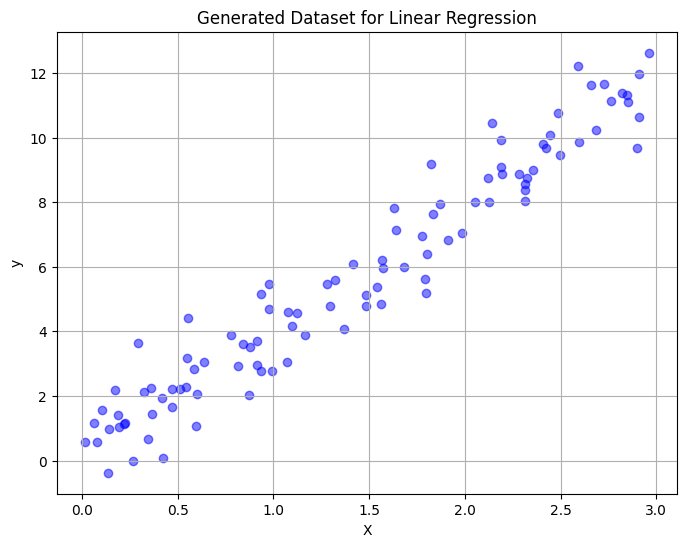

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_mock_dataset(n_points=100):
  """Generate a simple dataset with a linear relationship between X and y."""
  np.random.seed(42)  # For reproducibility
  X = 3 * np.random.rand(n_points, 1)
  y = 4 * X + np.random.randn(n_points, 1)
  return X, y

def plot_dataset(X, y):
  """Plots the dataset in a scatter plot."""
  plt.figure(figsize=(8, 6))
  plt.scatter(X, y, color='blue', alpha=0.5)
  plt.title('Generated Dataset for Linear Regression')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.grid(True)
  plt.show()


def print_model_line_against_points(params, X, y):
  """Plots the dataset in a scatter plot, and the line learned by the model."""
  model_preds = predict(params, X)

  plt.figure(figsize=(6, 3))
  plt.scatter(X, y, color='blue', alpha=0.5)
  plt.plot(X, model_preds, color='red')
  plt.title('Generated Dataset for Linear Regression')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.grid(True)
  plt.show()

X, y = get_mock_dataset()

print("First 5 elements of X are:", X[:5])
print("First 5 elements of y are:", y[:5])

plot_dataset(X=X, y=y)

In [201]:
#FUNCTIONS

In [202]:
n_features = 1

def initialize(n_features):
  """Initializes the list of params with random numbers in the range [0, 1].
     The number of params must be n_features + 1, to account for the bias term.
  """
  params = []
  for i in range(n_features +1):
    param = random.uniform(0,1)
    params.append(param)

  return params

In [203]:
params = initialize(n_features = n_features)
print(params)

[0.8595262420801267, 0.4193676304368956]


In [204]:
def predict(params, features):
  """Performs inference for the linear regression.
  Returns the product of params and features + the bias term as is.
  Assume that the bias term is the first element of the list params (i.e.
  params[0])."""
  if len(params) != len(features[0])+1:
    # This line is to check that the function is called with correct inputs.
    raise ValueError(f"Len of params must be 1+ len(features[0]). Got: {len(params)} != {len(features[0])}")

  y_pred = []

  for feature in features:
    pred = params[0] + (params[1] * feature[0])
    y_pred.append(pred)

  return y_pred

In [205]:
y_pred = predict(params = params, features = X)
print(y_pred)

[1.3307362485138419, 2.0556226597848766, 1.7804499366949622, 1.6127002119560916, 1.0558137447191185, 1.055783399143727, 0.9326014024867071, 1.9492649554639199, 1.6157907763645154, 1.7503543994631428, 0.8854236538698441, 2.0797726313958527, 1.906824735321441, 1.126670691162806, 1.0882807590358508, 1.0902679862061513, 1.2422942876063696, 1.519723825950524, 1.402957518921021, 1.2259224653972087, 1.6293001379871654, 1.0350238714865507, 1.227074269083229, 1.320447136393833, 1.433309207863599, 1.8473583892963252, 1.1107364047324992, 1.5064860758598186, 1.6048447240200363, 0.9179656406257306, 1.6238801768582494, 1.0740631351293293, 0.9413678392992729, 2.0533218800214397, 2.0743906948334465, 1.8765732830733381, 1.2427617058101905, 0.9824078111119853, 1.7203617910653333, 1.4132833670715281, 1.0130628981887955, 1.482509744401408, 0.9027905399230816, 2.003544869063239, 1.1850980851444344, 1.6930474435836325, 1.2516908481617801, 1.5138253232021581, 1.54734402523118, 1.0920921670484551, 2.079363465

In [206]:
def compute_mse_loss(predictions, labels):
  """Returns mse(predictions, labels)"""
  if len(predictions) != len(labels):
    # This line is to check that the function is called with correct inputs.
    raise ValueError(f"Predictions and labels must have the same len. Got: {len(predictions)} != {len(labels)}")

  total = 0
  index = 0
  for label in labels:
    operation = (label - predictions[index])**2
    index +=1
    total = total + operation

  mse = 1/len(labels) * total

  return mse

In [207]:
mse = compute_mse_loss(predictions = y_pred, labels = y)
print(mse)

[27.62574121]


In [208]:
def compute_bias_gradient(predictions, labels, X):
  total = 0
  for i in range(len(labels)):
    operation = predictions[i] - labels[i][0]
    total = total + operation

  bias_gradient = 2/len(labels) * total

  return bias_gradient

def compute_theta1_gradient(predictions, labels, X):
  total = 0
  for i in range(len(labels)):
    operation = (predictions[i] - labels[i][0]) * X[i][0]
    total = total + operation

  theta_1_gradient = 2/len(labels) * total

  return theta_1_gradient

In [209]:
bias_gradient = compute_bias_gradient(predictions = y_pred, labels = y, X = X)

In [210]:
theta_1_gradient = compute_theta1_gradient(predictions = y_pred, labels = y, X = X)

In [211]:
def update_bias_param(params, learning_rate, bias_gradient):
  bias_param = params[0] - learning_rate * bias_gradient

  return bias_param

In [212]:
update_bias_param(params = params, learning_rate = 0.005, bias_gradient = bias_gradient)

0.9014265077362097

In [213]:
def update_theta1_param(params, learning_rate, theta_1_gradient):
  theta_1_param = params[1] - learning_rate * theta_1_gradient

  return theta_1_param

In [214]:
update_theta1_param(params = params, learning_rate = 0.005, theta_1_gradient = theta_1_gradient)

0.5054957577442863

In [215]:
def fit(params, X, y, n_epochs, learning_rate):
  if len(X) != len(y):
    # This line is to check that the function is called with correct inputs.
    raise ValueError(f"X and y must have the same len. Got: {len(X)} != {len(y)}")
  """Fits a linear regression over the X, y dataset."""

  loss_values = []

  for i in range(n_epochs):
    y_pred = predict(params = params, features = X)
    print('the model predictions are:', y_pred)
    mse = compute_mse_loss(predictions = y_pred, labels = y)
    print('the mse is:', mse)
    loss_values.append(mse)
    print('all loss values:', loss_values)
    bias_param = update_bias_param(
        params = params,
        learning_rate = 0.005,
        bias_gradient = bias_gradient)
    theta_1_param = update_theta1_param(
        params = params,
        learning_rate = 0.005,
        theta_1_gradient = theta_1_gradient)
    params[0] = bias_param
    params[1] = theta_1_param
    if i > 0:
      if loss_values[i-1] > loss_values[i]:
        print_model_line_against_points(params=params, X=X, y=y)
      else:
        break

  """Steps:
  1. Compute predictions for every x in X.
  2. Compute the loss between the predictions and the labels.
  3. Print the loss.
  4. Use loss and learning rate to update the gradients.
  5. Plot the linear regression line against the dataset. Use the function
  6. Repeat this process n_epochs time.
  7. If at some point the loss of epoch n is smaller than loss of epoch n-1 (=if the
     loss starts to grow instead of decreasing) , stop the process.
  """

In [216]:
#TESTS

def test_initialize():
  params = initialize(n_features=1)
  assert len(params) == 2
  for p in params:
    assert p >= 0 and p <= 1
  print("test passed")

def test_inference():

  params = [1, 2]
  features = [[2]]
  predictions = predict(params=params, features = features)
  assert params == [1, 2], f"Expected params to be [1,2], got params={params}"
  assert features == [[2]], f"Expected features to be [[2]], got features={features}"
  assert predictions == [5], f"Expected predictions to be [5], got predictions={predictions}"
  print("test passed")

def test_compute_mse_loss():
  assert compute_mse_loss(predictions=[1, 3, 2, 2], labels=[1, 2, 1, 2]) == 0.5
  print("test passed")

def test_compute_bias_gradient():
  bias_grad = compute_bias_gradient(predictions=[2, 3], labels = [[1], [2]], X = [[0, 1], [1, 2]])
  assert bias_grad == 2, f"Expected 2, got {bias_grad}"
  print("test passed")

def test_compute_theta1_gradient():
  grad = compute_bias_gradient(predictions=[2, 5], labels=[[1], [2]], X=[[0, 1], [1, 2]])
  assert grad == 4, f"Expected 4, got {grad}"
  print('test passed')

def run_tests():
  test_initialize()
  test_inference()
  test_compute_mse_loss()
  test_compute_bias_gradient()
  test_compute_theta1_gradient()

run_tests()

test passed
test passed
test passed
test passed
test passed


Random params are: [0.8057015483707372, 0.15839109073003488]
the model predictions are: [0.983673002209909, 1.2574555762654827, 1.1535255049245956, 1.090168059231011, 0.8798374362724211, 0.8798259750426164, 0.8333013284253215, 1.2172853018516263, 1.0913353354633508, 1.1421587121101666, 0.8154827498816521, 1.2665767865519726, 1.2012560419104454, 0.9065994184056704, 0.8920999130043936, 0.8928504694522156, 0.9502693304962775, 1.0550517790922305, 1.010950276285127, 0.9440858518757514, 1.0964376904549578, 0.8719853025871983, 0.9445208769680449, 0.979786904254199, 1.0224138151188356, 1.1787961791908668, 0.9005811928094991, 1.0500520091445738, 1.0872011175500038, 0.8277735429774793, 1.0943906236509962, 0.8867300542105776, 0.8366123266707313, 1.256586594041269, 1.2645440812583588, 1.189830361505039, 0.9504458698230089, 0.8521127263848756, 1.1308307945190574, 1.014850249083618, 0.8636908557542351, 1.0409963810612948, 0.822042054474834, 1.2377862992957338, 0.9286668790049123, 1.1205144301260817,

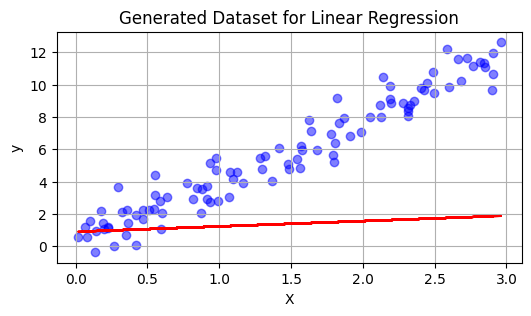

the model predictions are: [1.2610241677489402, 1.8325555644702343, 1.6155976406881902, 1.4833365953866084, 1.0442635275427001, 1.0442396017954132, 0.9471176561972621, 1.7486986092873638, 1.4857733283223333, 1.5918690341620731, 0.9099207048654209, 1.851596433206343, 1.7152369276803667, 1.1001301694588566, 1.0698619078562113, 1.0714287226048183, 1.1912927496118744, 1.4100300428983572, 1.3179665009297015, 1.1783845059635107, 1.4964246858273915, 1.0278719038323951, 1.1792926371674959, 1.2529117924449813, 1.3418970684013485, 1.6683511214723947, 1.0875668976997654, 1.3995928355219323, 1.4771429932963875, 0.935578196651018, 1.4921513570602634, 1.0586521261262651, 0.9540294892760055, 1.8307415314696163, 1.8473530846309658, 1.6913853910983945, 1.191661282080864, 0.9863871553141843, 1.568221581123385, 1.326107840488603, 1.0105569348288832, 1.3806888720959236, 0.9236134993341465, 1.791495210728594, 1.146196821516181, 1.546685783343186, 1.1987013991535225, 1.4053794114864275, 1.431806987295638, 1

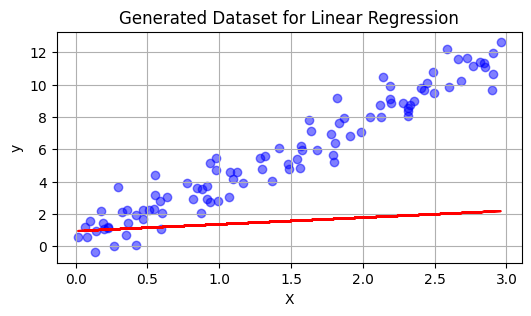

the model predictions are: [1.3996997505184559, 2.1201055585726096, 1.8466337085699873, 1.6799208634644072, 1.1264765731778397, 1.1264464151718114, 1.0040258200832324, 2.0144052630052327, 1.6829923247518244, 1.8167241951880264, 0.9571396823573052, 2.144106256533528, 1.972227370565327, 1.1968955449854495, 1.15874290528212, 1.1607178491811196, 1.3118044591696727, 1.5875191748014204, 1.4714746132519885, 1.2955338330073902, 1.696418183513608, 1.1058152044549936, 1.2966785172672213, 1.3894742365403725, 1.501638695042605, 1.9131285926131585, 1.1810597501448985, 1.5743632487106116, 1.6721139311695794, 0.9894805234877875, 1.691031723764897, 1.144613162084109, 1.0127380705786426, 2.1178190001837898, 2.138757586317269, 1.9421629058950725, 1.3122689882097915, 1.0535243697788386, 1.7869169744255489, 1.4817366361910955, 1.0839899743662071, 1.550535117613238, 0.9743992217638027, 2.0683496664450236, 1.2549617927718155, 1.7597714599517382, 1.321142938543263, 1.5816571313520262, 1.6149686505703325, 1.1

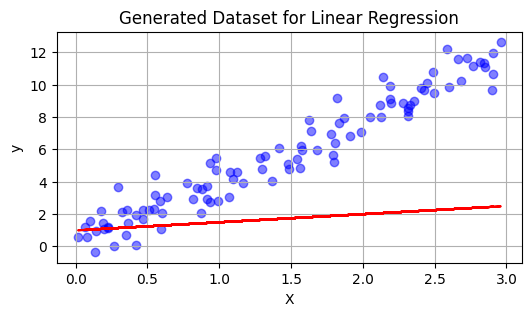

the model predictions are: [1.5383753332879713, 2.4076555526749854, 2.077669776451785, 1.8765051315422059, 1.2086896188129792, 1.20865322854821, 1.0609339839692027, 2.2801119167231017, 1.8802113211813156, 2.0415793562139797, 1.0043586598491896, 2.4366160798607135, 2.229217813450288, 1.2936609205120426, 1.2476239027080291, 1.250006975757421, 1.4323161687274713, 1.7650083067044835, 1.6249827255742757, 1.41268316005127, 1.896411681199825, 1.1837585050775918, 1.414064397366947, 1.5260366806357637, 1.6613803216838616, 2.1579060637539227, 1.2745526025900318, 1.7491336618992908, 1.8670848690427713, 1.0433828503245568, 1.8899120904695308, 1.230574198041953, 1.0714466518812797, 2.4048964688979635, 2.4301620880035726, 2.19294042069175, 1.432876694338719, 1.120661584243493, 2.0056123677277125, 1.6373654318935884, 1.1574230139035313, 1.7203813631305525, 1.0251849441934588, 2.345204122161454, 1.36372676402745, 1.9728571365602903, 1.4435844779330034, 1.757934851217625, 1.7981303138450269, 1.25219452

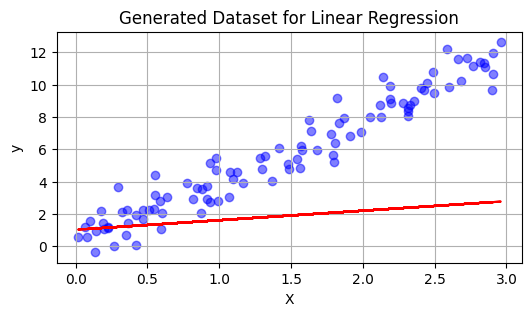

the model predictions are: [1.677050916057487, 2.695205546777361, 2.308705844333582, 2.073089399620004, 1.2909026644481185, 1.2908600419246081, 1.117842147855173, 2.5458185704409706, 2.0774303176108067, 2.266434517239933, 1.0515776373410737, 2.7291259031878985, 2.4862082563352486, 1.3904262960386355, 1.3365049001339377, 1.3392961023337224, 1.5528278782852696, 1.9424974386075469, 1.7784908378965627, 1.5298324870951494, 2.096405178886042, 1.26170180570019, 1.5314502774666723, 1.6625991247311547, 1.8211219483251182, 2.4026835348946864, 1.3680454550351648, 1.92390407508797, 2.0620558069159634, 1.0972851771613261, 2.0887924571741645, 1.3165352339997964, 1.1301552331839166, 2.691973937612137, 2.7215665896898757, 2.4437179354884275, 1.5534844004676467, 1.1877987987081473, 2.2243077610298765, 1.7929942275960808, 1.230856053440855, 1.890227608647867, 1.075970666623115, 2.622058577877884, 1.4724917352830842, 2.1859428131688423, 1.566026017322744, 1.9342125710832236, 1.981291977119721, 1.34185829

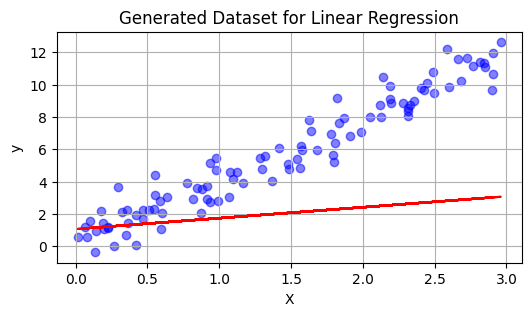

the model predictions are: [1.8157264988270025, 2.9827555408797366, 2.539741912215379, 2.269673667697803, 1.373115710083258, 1.3730668553010066, 1.1747503117411433, 2.811525224158839, 2.274649314040298, 2.491289678265886, 1.0987966148329582, 3.0216357265150835, 2.7431986992202093, 1.4871916715652285, 1.4253858975598468, 1.4285852289100238, 1.673339587843068, 2.1199865705106102, 1.93199895021885, 1.646981814139029, 2.2963986765722586, 1.3396451063227885, 1.648836157566398, 1.7991615688265459, 1.9808635749663748, 2.6474610060354506, 1.4615383074802981, 2.0986744882766493, 2.257026744789155, 1.1511875039980954, 2.2876728238787982, 1.4024962699576404, 1.1888638144865538, 2.979051406326311, 3.0129710913761794, 2.6944954502851055, 1.6740921065965741, 1.2549360131728018, 2.4430031543320405, 1.9486230232985733, 1.3042890929781792, 2.0600738541651813, 1.1267563890527712, 2.8989130335943143, 1.5812567065387184, 2.3990284897773946, 1.6884675567124845, 2.1104902909488223, 2.1644536403944157, 1.431

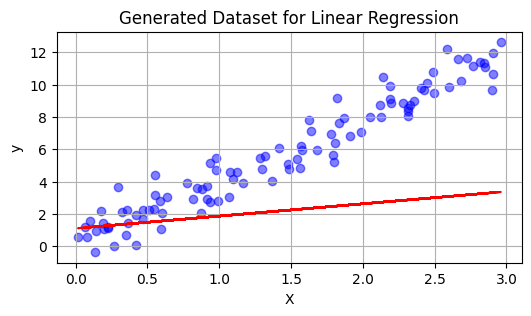

the model predictions are: [1.9544020815965182, 3.2703055349821124, 2.7707779800971766, 2.4662579357756016, 1.4553287557183976, 1.455273668677405, 1.2316584756271136, 3.077231877876708, 2.471868310469789, 2.7161448392918395, 1.1460155923248425, 3.3141455498422694, 3.00018914210517, 1.5839570470918216, 1.5142668949857556, 1.5178743554863252, 1.7938512974008665, 2.2974757024136734, 2.085507062541137, 1.7641311411829088, 2.4963921742584754, 1.417588406945387, 1.7662220376661233, 1.935724012921937, 2.1406052016076313, 2.892238477176215, 1.5550311599254312, 2.2734449014653286, 2.4519976826623466, 1.2050898308348648, 2.486553190583432, 1.4884573059154842, 1.2475723957891909, 3.2661288750404847, 3.304375593062483, 2.9452729650817835, 1.7946998127255016, 1.322073227637456, 2.661698547634204, 2.1042518190010657, 1.3777221325155031, 2.229920099682496, 1.1775421114824274, 3.1757674893107444, 1.6900216777943529, 2.612114166385947, 1.8109090961022252, 2.286768010814421, 2.3476153036691096, 1.521185

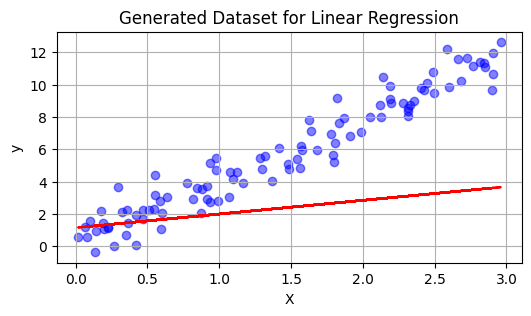

the model predictions are: [2.093077664366034, 3.557855529084488, 3.001814047978974, 2.6628422038534003, 1.5375418013535371, 1.5374804820538035, 1.288566639513084, 3.3429385315945765, 2.6690873068992804, 2.941000000317793, 1.1932345698167268, 3.6066553731694544, 3.257179584990131, 1.6807224226184148, 1.6031478924116644, 1.6071634820626266, 1.914363006958665, 2.4749648343167365, 2.2390151748634244, 1.8812804682267883, 2.696385671944692, 1.4955317075679853, 1.8836079177658487, 2.072286457017328, 2.3003468282488884, 3.1370159483169786, 1.6485240123705645, 2.448215314654008, 2.6469686205355387, 1.258992157671634, 2.6854335572880657, 1.574418341873328, 1.306280977091828, 3.553206343754659, 3.595780094748786, 3.196050479878461, 1.915307518854429, 1.3892104421021105, 2.8803939409363677, 2.2598806147035586, 1.4511551720528273, 2.3997663451998106, 1.2283278339120838, 3.4526219450271745, 1.7987866490499873, 2.8251998429944987, 1.9333506354919656, 2.4630457306800198, 2.530776966943804, 1.61084960

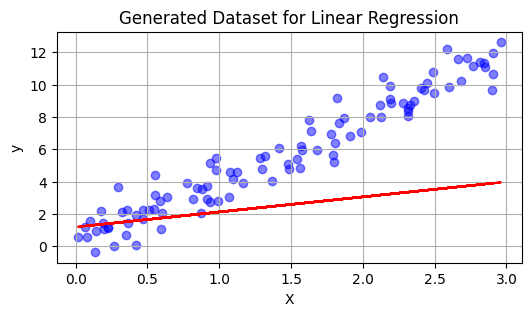

the model predictions are: [2.2317532471355497, 3.845405523186864, 3.2328501158607708, 2.8594264719311995, 1.6197548469886767, 1.6196872954302017, 1.3454748033990542, 3.6086451853124455, 2.8663063033287717, 3.1658551613437464, 1.2404535473086111, 3.8991651964966394, 3.5141700278750916, 1.7774877981450077, 1.6920288898375733, 1.696452608638928, 2.0348747165164633, 2.6524539662198, 2.3925232871857114, 1.998429795270668, 2.896379169630909, 1.5734750081905837, 2.0009937978655743, 2.2088489011127193, 2.460088454890145, 3.3817934194577433, 1.7420168648156977, 2.6229857278426874, 2.841939558408731, 1.3128944845084036, 2.8843139239926994, 1.6603793778311717, 1.3649895583944651, 3.840283812468832, 3.88718459643509, 3.4468279946751386, 2.0359152249833565, 1.456347656566765, 3.099089334238532, 2.415509410406051, 1.5245882115901512, 2.5696125907171252, 1.27911355634174, 3.7294764007436045, 1.9075516203056218, 3.0382855196030514, 2.0557921748817063, 2.6393234505456187, 2.7139386302184985, 1.7005133

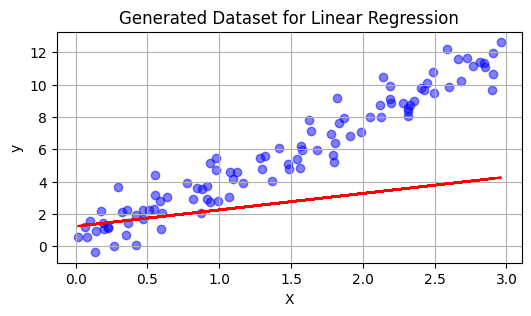

the model predictions are: [2.370428829905065, 4.13295551728924, 3.4638861837425683, 3.056010740008998, 1.7019678926238162, 1.7018941088066002, 1.4023829672850248, 3.8743518390303144, 3.063525299758263, 3.3907103223697, 1.2876725248004957, 4.191675019823824, 3.7711604707600523, 1.8742531736716006, 1.780909887263482, 1.7857417352152294, 2.1553864260742617, 2.8299430981228637, 2.5460313995079984, 2.1155791223145477, 3.0963726673171257, 1.6514183088131822, 2.1183796779653, 2.3454113452081105, 2.6198300815314015, 3.626570890598507, 1.8355097172608308, 2.7977561410313667, 3.0369104962819224, 1.366796811345173, 3.083194290697333, 1.7463404137890155, 1.4236981396971022, 4.127361281183006, 4.178589098121393, 3.697605509471817, 2.1565229311122844, 1.5234848710314193, 3.3177847275406958, 2.571138206108544, 1.5980212511274754, 2.73945883623444, 1.3298992787713961, 4.006330856460035, 2.016316591561256, 3.251371196211603, 2.178233714271447, 2.8156011704112176, 2.897100293493193, 1.7901771438077811,

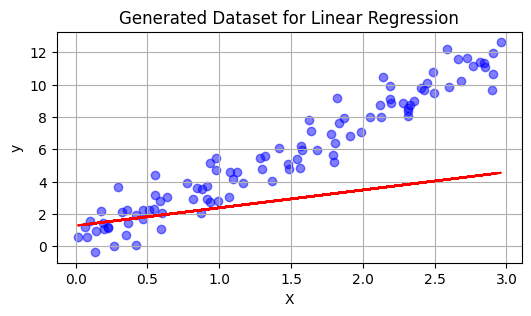

the model predictions are: [2.5091044126745805, 4.420505511391616, 3.694922251624366, 3.2525950080867965, 1.7841809382589557, 1.7841009221829984, 1.459291131170995, 4.140058492748183, 3.260744296187754, 3.6155654833956525, 1.33489150229238, 4.484184843151009, 4.028150913645012, 1.9710185491981937, 1.8697908846893911, 1.8750308617915308, 2.27589813563206, 3.007432230025927, 2.6995395118302854, 2.232728449358427, 3.2963661650033425, 1.7293616094357804, 2.235765558065025, 2.4819737893035017, 2.7795717081726576, 3.8713483617392708, 1.9290025697059638, 2.9725265542200456, 3.231881434155114, 1.4206991381819423, 3.2820746574019664, 1.8323014497468595, 1.4824067209997394, 4.4144387498971795, 4.4699935998076965, 3.9483830242684945, 2.277130637241212, 1.5906220854960735, 3.5364801208428593, 2.7267670018110364, 1.6714542906647993, 2.9093050817517536, 1.3806850012010523, 4.283185312176465, 2.1250815628168906, 3.464456872820155, 2.300675253661187, 2.9918788902768156, 3.0802619567678873, 1.879840913

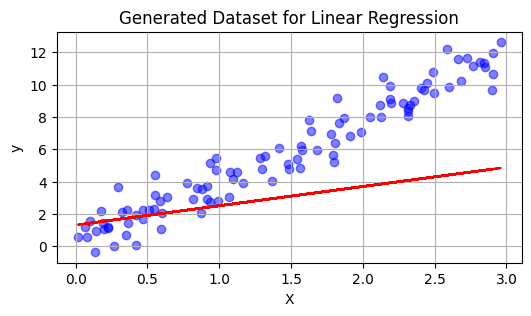

the model predictions are: [2.647779995444096, 4.7080555054939905, 3.9259583195061625, 3.449179276164595, 1.866393983894095, 1.8663077355593969, 1.5161992950569654, 4.405765146466052, 3.4579632926172454, 3.840420644421606, 1.3821104797842643, 4.776694666478194, 4.285141356529973, 2.067783924724787, 1.9586718821152997, 1.964319988367832, 2.396409845189859, 3.18492136192899, 2.8530476241525724, 2.349877776402307, 3.4963596626895592, 1.807304910058379, 2.3531514381647507, 2.618536233398893, 2.939313334813914, 4.1161258328800345, 2.022495422151097, 3.1472969674087246, 3.426852372028306, 1.4746014650187116, 3.4809550241066, 1.918262485704703, 1.5411153023023765, 4.701516218611353, 4.761398101494, 4.199160539065172, 2.3977383433701394, 1.657759299960728, 3.755175514145023, 2.882395797513529, 1.7448873302021233, 3.0791513272690683, 1.4314707236307087, 4.560039767892895, 2.2338465340725246, 3.677542549428707, 2.423116793050928, 3.1681566101424146, 3.2634236200425812, 1.9695046835929928, 4.7755

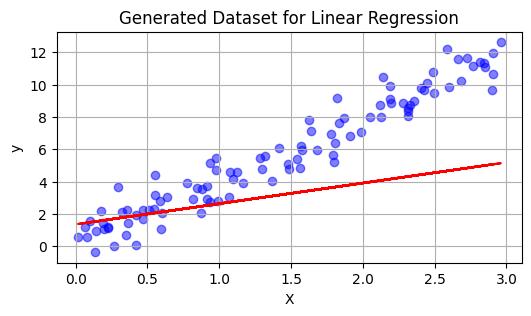

the model predictions are: [2.7864555782136113, 4.995605499596366, 4.15699438738796, 3.645763544242394, 1.9486070295292346, 1.9485145489357953, 1.5731074589429357, 4.67147180018392, 3.655182289046736, 4.065275805447559, 1.4293294572761486, 5.069204489805379, 4.542131799414933, 2.16454930025138, 2.047552879541209, 2.053609114944133, 2.5169215547476567, 3.362410493832053, 3.00655573647486, 2.4670271034461866, 3.696353160375776, 1.8852482106809774, 2.4705373182644763, 2.755098677494284, 3.0990549614551703, 4.360903304020798, 2.11598827459623, 3.322067380597404, 3.6218233099014974, 1.528503791855481, 3.679835390811234, 2.004223521662547, 1.5998238836050136, 4.988593687325526, 5.052802603180303, 4.44993805386185, 2.518346049499067, 1.7248965144253823, 3.9738709074471865, 3.0380245932160213, 1.8183203697394472, 3.248997572786383, 1.4822564460603649, 4.836894223609324, 2.342611505328159, 3.8906282260372596, 2.5455583324406685, 3.344434330008013, 3.446585283317275, 2.0591684534855985, 5.067957

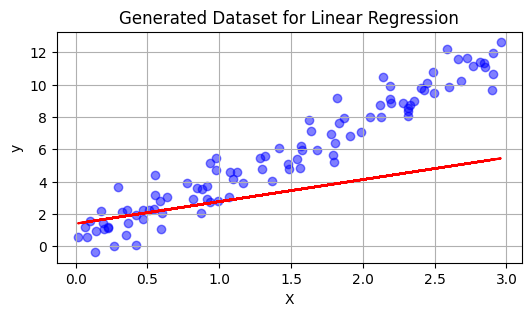

the model predictions are: [2.9251311609831268, 5.283155493698741, 4.388030455269757, 3.8423478123201926, 2.030820075164374, 2.0307213623121934, 1.630015622828906, 4.937178453901789, 3.852401285476227, 4.290130966473512, 1.4765484347680329, 5.361714313132564, 4.799122242299894, 2.2613146757779727, 2.1364338769671174, 2.1428982415204345, 2.6374332643054554, 3.5398996257351163, 3.160063848797147, 2.584176430490066, 3.8963466580619928, 1.9631915113035756, 2.5879231983642015, 2.891661121589675, 3.258796588096427, 4.605680775161562, 2.2094811270413635, 3.4968377937860833, 3.8167942477746895, 1.5824061186922505, 3.8787157575158675, 2.0901845576203906, 1.6585324649076507, 5.275671156039699, 5.344207104866606, 4.700715568658527, 2.6389537556279943, 1.7920337288900368, 4.19256630074935, 3.1936533889185137, 1.8917534092767712, 3.4188438183036967, 1.533042168490021, 5.113748679325754, 2.4513764765837935, 4.103713902645811, 2.6679998718304088, 3.5207120498736115, 3.629746946591969, 2.1488322233782

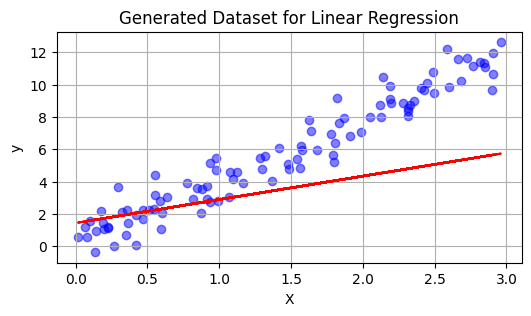

the model predictions are: [3.0638067437526426, 5.570705487801117, 4.619066523151554, 4.0389320803979905, 2.1130331207995137, 2.112928175688592, 1.6869237867148763, 5.202885107619657, 4.049620281905718, 4.514986127499466, 1.5237674122599172, 5.654224136459749, 5.056112685184854, 2.3580800513045657, 2.2253148743930264, 2.232187368096736, 2.7579449738632533, 3.7173887576381794, 3.313571961119434, 2.7013257575339455, 4.0963401557482095, 2.041134811926174, 2.7053090784639267, 3.028223565685066, 3.4185382147376835, 4.850458246302326, 2.3029739794864965, 3.6716082069747618, 4.011765185647881, 1.6363084455290198, 4.077596124220501, 2.1761455935782346, 1.7172410462102878, 5.5627486247538735, 5.635611606552909, 4.951493083455205, 2.7595614617569217, 1.859170943354691, 4.411261694051514, 3.349282184621006, 1.9651864488140953, 3.5886900638210113, 1.5838278909196772, 5.390603135042184, 2.5601414478394275, 4.316799579254363, 2.790441411220149, 3.6969897697392105, 3.812908609866664, 2.23849599327081

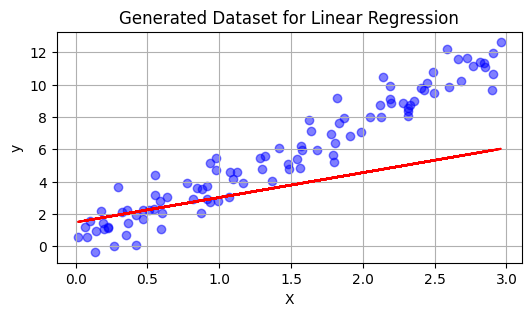

the model predictions are: [3.202482326522158, 5.858255481903493, 4.850102591033351, 4.235516348475789, 2.195246166434653, 2.1951349890649903, 1.7438319506008466, 5.468591761337526, 4.24683927833521, 4.739841288525419, 1.5709863897518017, 5.946733959786934, 5.313103128069814, 2.4548454268311586, 2.314195871818935, 2.3214764946730373, 2.878456683421052, 3.8948778895412426, 3.467080073441721, 2.818475084577825, 4.296333653434425, 2.119078112548772, 2.8226949585636523, 3.1647860097804568, 3.57827984137894, 5.09523571744309, 2.3964668319316296, 3.846378620163441, 4.206736123521073, 1.690210772365789, 4.276476490925134, 2.262106629536078, 1.775949627512925, 5.849826093468047, 5.927016108239212, 5.202270598251882, 2.880169167885849, 1.9263081578193453, 4.629957087353677, 3.5049109803234986, 2.0386194883514195, 3.758536309338326, 1.6346136133493334, 5.667457590758614, 2.6689064190950624, 4.529885255862915, 2.91288295060989, 3.8732674896048085, 3.996070273141358, 2.3281597631634163, 5.94523489

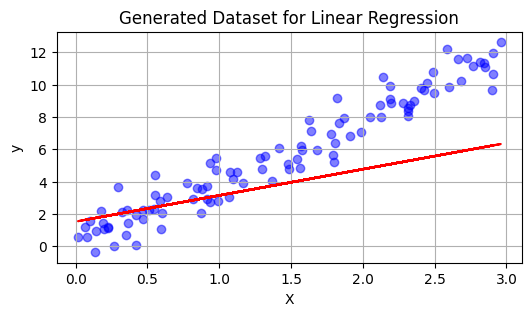

the model predictions are: [3.3411579092916734, 6.145805476005868, 5.081138658915148, 4.432100616553588, 2.2774592120697927, 2.2773418024413887, 1.800740114486817, 5.734298415055395, 4.4440582747647, 4.964696449551371, 1.618205367243686, 6.239243783114119, 5.570093570954775, 2.5516108023577515, 2.4030768692448436, 2.4107656212493387, 2.99896839297885, 4.072367021444306, 3.6205881857640083, 2.9356244116217045, 4.496327151120642, 2.197021413171371, 2.940080838663378, 3.301348453875848, 3.7380214680201966, 5.340013188583853, 2.4899596843767626, 4.0211490333521205, 4.401707061394265, 1.7441130992025584, 4.475356857629768, 2.348067665493922, 1.8346582088155619, 6.13690356218222, 6.2184206099255155, 5.45304811304856, 3.0007768740147767, 1.9934453722839998, 4.848652480655841, 3.660539776025991, 2.112052527888743, 3.9283825548556397, 1.6853993357789896, 5.944312046475044, 2.7776713903506964, 4.742970932471467, 3.0353244899996303, 4.049545209470407, 4.179231936416052, 2.4178235330560223, 6.2376

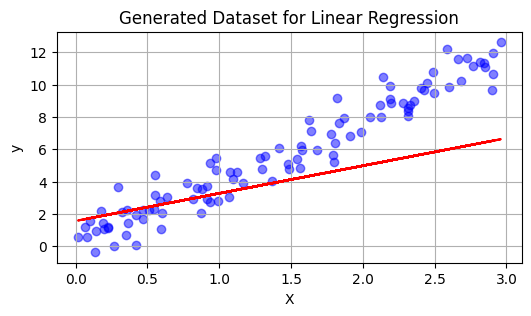

the model predictions are: [3.4798334920611893, 6.433355470108244, 5.312174726796945, 4.628684884631387, 2.359672257704932, 2.359548615817787, 1.8576482783727872, 6.000005068773264, 4.641277271194191, 5.1895516105773245, 1.6654243447355703, 6.531753606441304, 5.827084013839736, 2.6483761778843444, 2.4919578666707527, 2.50005474782564, 3.1194801025366488, 4.249856153347369, 3.7740962980862953, 3.052773738665584, 4.696320648806859, 2.274964713793969, 3.057466718763103, 3.437910897971239, 3.897763094661453, 5.584790659724618, 2.5834525368218957, 4.1959194465408, 4.596677999267456, 1.7980154260393277, 4.6742372243344015, 2.4340287014517656, 1.8933667901181992, 6.423981030896393, 6.509825111611819, 5.703825627845237, 3.121384580143704, 2.0605825867486542, 5.0673478739580045, 3.8161685717284834, 2.1854855674260674, 4.098228800372954, 1.736185058208646, 6.2211665021914735, 2.886436361606331, 4.956056609080019, 3.1577660293893706, 4.225822929336006, 4.362393599690746, 2.507487302948628, 6.5300

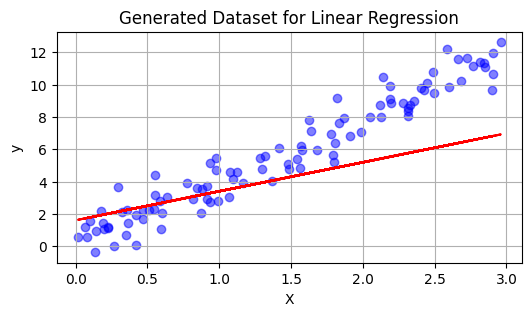

the model predictions are: [3.6185090748307047, 6.720905464210619, 5.543210794678743, 4.825269152709185, 2.4418853033400714, 2.441755429194185, 1.9145564422587575, 6.265711722491132, 4.8384962676236825, 5.414406771603278, 1.7126433222274546, 6.824263429768489, 6.084074456724696, 2.745141553410938, 2.5808388640966617, 2.5893438744019415, 3.2399918120944466, 4.427345285250432, 3.9276044104085823, 3.1699230657094635, 4.896314146493076, 2.3529080144165673, 3.1748525988628287, 3.5744733420666304, 4.057504721302709, 5.829568130865382, 2.676945389267029, 4.370689859729478, 4.791648937140648, 1.8519177528760973, 4.873117591039035, 2.5199897374096096, 1.952075371420836, 6.7110584996105676, 6.801229613298122, 5.954603142641915, 3.2419922862726316, 2.1277198012133085, 5.286043267260169, 3.971797367430976, 2.258918606963391, 4.268075045890269, 1.7869707806383022, 6.498020957907904, 2.9952013328619653, 5.169142285688571, 3.2802075687791112, 4.402100649201604, 4.545555262965441, 2.5971510728412337, 

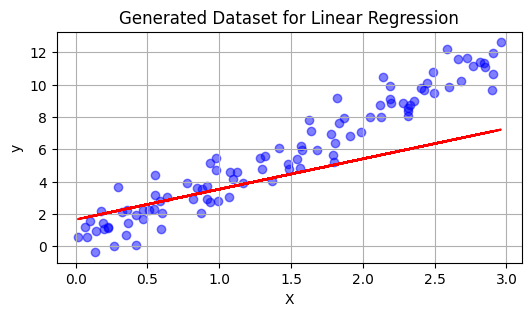

the model predictions are: [3.75718465760022, 7.008455458312994, 5.774246862560539, 5.021853420786983, 2.524098348975211, 2.5239622425705837, 1.9714646061447278, 6.531418376209001, 5.035715264053174, 5.639261932629231, 1.759862299719339, 7.116773253095674, 6.341064899609656, 2.8419069289375303, 2.6697198615225703, 2.678633000978243, 3.3605035216522454, 4.604834417153495, 4.081112522730869, 3.287072392753343, 5.0963076441792925, 2.430851315039166, 3.2922384789625543, 3.7110357861620216, 4.2172463479439655, 6.0743456020061455, 2.770438241712162, 4.545460272918158, 4.986619875013839, 1.9058200797128666, 5.071997957743669, 2.605950773367453, 2.0107839527234734, 6.998135968324741, 7.092634114984425, 6.205380657438592, 3.362599992401559, 2.1948570156779628, 5.5047386605623325, 4.127426163133468, 2.3323516465007152, 4.437921291407583, 1.8377565030679583, 6.774875413624334, 3.1039663041175993, 5.382227962297123, 3.402649108168852, 4.578378369067203, 4.728716926240135, 2.6868148427338396, 7.114

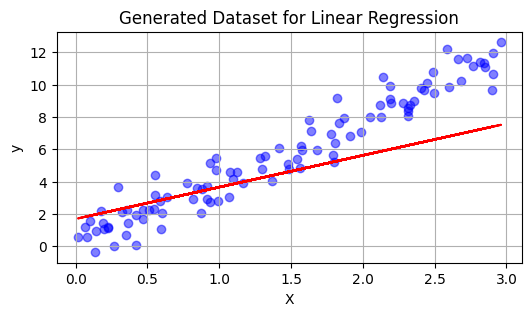

the model predictions are: [3.8958602403697355, 7.29600545241537, 6.005282930442337, 5.218437688864782, 2.6063113946103504, 2.606169055946982, 2.028372770030698, 6.797125029926869, 5.232934260482664, 5.864117093655184, 1.8070812772112232, 7.409283076422859, 6.598055342494617, 2.9386723044641236, 2.758600858948479, 2.7679221275545443, 3.4810152312100433, 4.782323549056558, 4.234620635053156, 3.4042217197972224, 5.296301141865509, 2.508794615661764, 3.4096243590622795, 3.847598230257412, 4.376987974585222, 6.319123073146909, 2.8639310941572953, 4.720230686106837, 5.181590812887031, 1.959722406549636, 5.270878324448302, 2.6919118093252967, 2.0694925340261103, 7.285213437038914, 7.384038616670728, 6.45615817223527, 3.4832076985304865, 2.2619942301426175, 5.723434053864496, 4.283054958835961, 2.4057846860380394, 4.607767536924897, 1.8885422254976145, 7.051729869340764, 3.2127312753732338, 5.595313638905675, 3.525090647558592, 4.754656088932801, 4.911878589514829, 2.7764786126264456, 7.40736

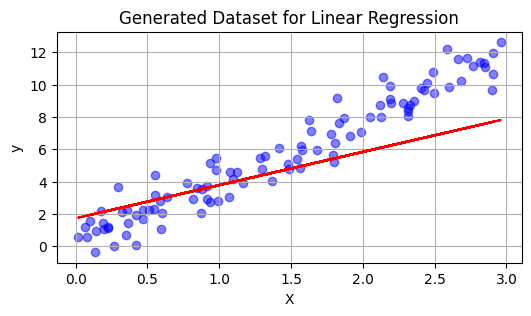

the model predictions are: [4.034535823139251, 7.583555446517745, 6.236318998324133, 5.415021956942581, 2.68852444024549, 2.68837586932338, 2.0852809339166685, 7.062831683644738, 5.430153256912155, 6.088972254681138, 1.8543002547031078, 7.701792899750044, 6.855045785379577, 3.0354376799907166, 2.847481856374388, 2.857211254130845, 3.601526940767842, 4.9598126809596215, 4.388128747375443, 3.521371046841102, 5.496294639551726, 2.5867379162843624, 3.5270102391620046, 3.984160674352803, 4.536729601226479, 6.563900544287673, 2.957423946602428, 4.8950010992955155, 5.376561750760223, 2.013624733386405, 5.4697586911529354, 2.7778728452831407, 2.1282011153287472, 7.572290905753087, 7.675443118357031, 6.706935687031947, 3.603815404659414, 2.3291314446072713, 5.94212944716666, 4.438683754538453, 2.479217725575363, 4.777613782442212, 1.9393279479272707, 7.328584325057193, 3.321496246628868, 5.808399315514227, 3.6475321869483324, 4.9309338087984, 5.095040252789523, 2.8661423825190515, 7.69978963790

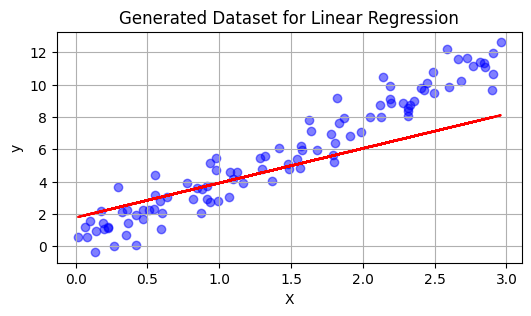

the model predictions are: [4.173211405908766, 7.871105440620122, 6.467355066205932, 5.611606225020379, 2.7707374858806295, 2.7705826826997786, 2.142189097802639, 7.328538337362607, 5.627372253341647, 6.313827415707091, 1.901519232194992, 7.9943027230772294, 7.112036228264538, 3.1322030555173095, 2.936362853800297, 2.946500380707147, 3.722038650325641, 5.137301812862685, 4.54163685969773, 3.6385203738849823, 5.696288137237943, 2.6646812169069607, 3.6443961192617307, 4.120723118448194, 4.696471227867735, 6.808678015428438, 3.0509167990475614, 5.069771512484196, 5.571532688633415, 2.0675270602231746, 5.668639057857569, 2.8638338812409847, 2.1869096966313846, 7.8593683744672616, 7.966847620043335, 6.957713201828626, 3.724423110788342, 2.396268659071926, 6.160824840468824, 4.594312550240946, 2.5526507651126873, 4.947460027959527, 1.990113670356927, 7.605438780773624, 3.4302612178845027, 6.0214849921227795, 3.7699737263380735, 5.107211528663999, 5.2782019160642175, 2.9558061524116575, 7.992

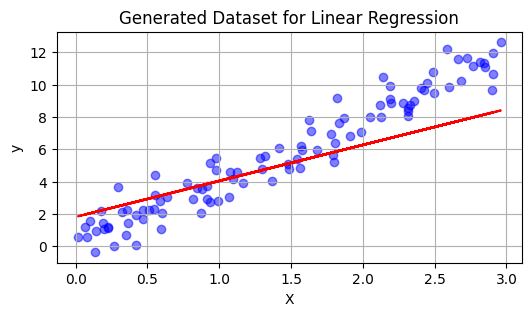

the model predictions are: [4.311886988678283, 8.158655434722498, 6.698391134087729, 5.808190493098178, 2.852950531515769, 2.852789496076177, 2.199097261688609, 7.594244991080477, 5.824591249771139, 6.538682576733045, 1.9487382096868764, 8.286812546404414, 7.369026671149499, 3.228968431043903, 3.0252438512262056, 3.0357895072834484, 3.8425503598834387, 5.314790944765748, 4.695144972020017, 3.7556697009288618, 5.89628163492416, 2.7426245175295594, 3.761781999361456, 4.257285562543586, 4.856212854508992, 7.053455486569201, 3.144409651492695, 5.244541925672875, 5.766503626506607, 2.121429387059944, 5.867519424562204, 2.9497949171988287, 2.245618277934022, 8.146445843181436, 8.258252121729639, 7.208490716625303, 3.8450308169172693, 2.4634058735365802, 6.379520233770988, 4.749941345943439, 2.6260838046500115, 5.117306273476841, 2.0408993927865833, 7.882293236490054, 3.539026189140137, 6.234570668731332, 3.8924152657278137, 5.283489248529598, 5.461363579338912, 3.0454699223042634, 8.28464121

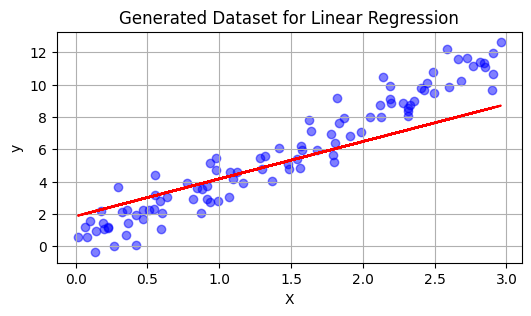

the model predictions are: [4.450562571447798, 8.446205428824873, 6.929427201969527, 6.004774761175978, 2.9351635771509086, 2.9349963094525755, 2.2560054255745796, 7.859951644798346, 6.02181024620063, 6.763537737758998, 1.9959571871787607, 8.579322369731601, 7.62601711403446, 3.3257338065704958, 3.1141248486521147, 3.12507863385975, 3.9630620694412375, 5.492280076668812, 4.848653084342305, 3.8728190279727412, 6.096275132610377, 2.8205678181521576, 3.879167879461182, 4.393848006638978, 5.015954481150249, 7.298232957709966, 3.237902503937828, 5.4193123388615545, 5.9614745643798, 2.175331713896713, 6.0663997912668375, 3.0357559531566727, 2.304326859236659, 8.433523311895609, 8.549656623415943, 7.459268231421982, 3.965638523046197, 2.530543088001235, 6.598215627073152, 4.905570141645931, 2.699516844187335, 5.287152518994156, 2.0916851152162397, 8.159147692206485, 3.647791160395772, 6.447656345339884, 4.014856805117555, 5.459766968395197, 5.644525242613606, 3.1351336921968693, 8.57706700916

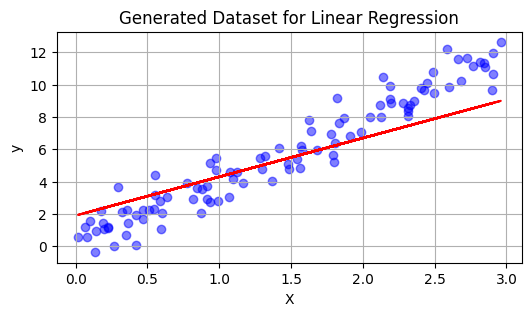

the model predictions are: [4.589238154217314, 8.73375542292725, 7.160463269851324, 6.201359029253776, 3.017376622786048, 3.017203122828974, 2.3129135894605497, 8.125658298516214, 6.219029242630121, 6.9883928987849515, 2.043176164670645, 8.871832193058786, 7.883007556919421, 3.4224991820970887, 3.2030058460780237, 3.214367760436051, 4.083573778999036, 5.669769208571875, 5.002161196664592, 3.9899683550166216, 6.296268630296594, 2.8985111187747563, 3.996553759560907, 4.530410450734369, 5.175696107791506, 7.543010428850731, 3.331395356382961, 5.594082752050234, 6.156445502252992, 2.2292340407334827, 6.265280157971471, 3.1217169891145162, 2.363035440539296, 8.720600780609784, 8.841061125102247, 7.71004574621866, 4.086246229175124, 2.597680302465889, 6.816911020375316, 5.061198937348424, 2.7729498837246593, 5.456998764511471, 2.1424708376458956, 8.436002147922915, 3.756556131651406, 6.660742021948437, 4.137298344507295, 5.636044688260796, 5.827686905888301, 3.2247974620894757, 8.86949279958

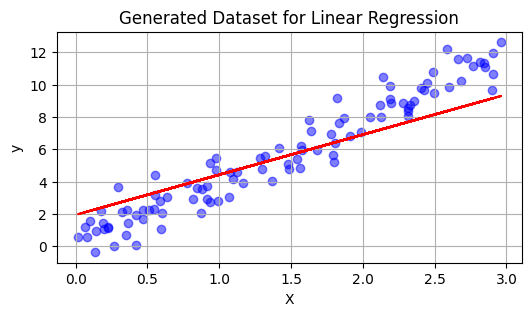

the model predictions are: [4.72791373698683, 9.021305417029625, 7.391499337733122, 6.397943297331575, 3.0995896684211877, 3.0994099362053724, 2.3698217533465202, 8.391364952234083, 6.4162482390596125, 7.213248059810906, 2.0903951421625293, 9.164342016385971, 8.13999799980438, 3.519264557623682, 3.2918868435039323, 3.3036568870123526, 4.204085488556835, 5.847258340474939, 5.15566930898688, 4.107117682060501, 6.496262127982811, 2.9764544193973546, 4.113939639660633, 4.66697289482976, 5.335437734432762, 7.7877878999914945, 3.4248882088280945, 5.768853165238913, 6.351416440126184, 2.2831363675702523, 6.464160524676106, 3.20767802507236, 2.421744021841933, 9.007678249323957, 9.13246562678855, 7.960823261015338, 4.206853935304053, 2.664817516930544, 7.03560641367748, 5.216827733050917, 2.8463829232619835, 5.626845010028785, 2.193256560075552, 8.712856603639345, 3.865321102907041, 6.8738276985569895, 4.259739883897036, 5.812322408126395, 6.010848569162996, 3.314461231982081, 9.16191859001207

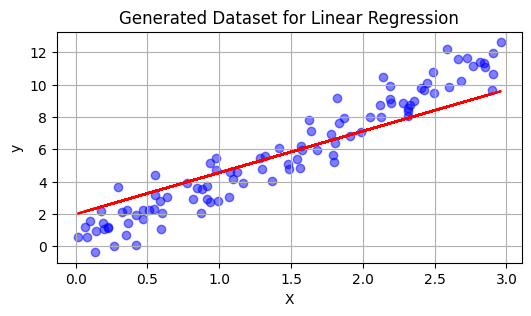

the model predictions are: [4.866589319756345, 9.308855411132, 7.6225354056149195, 6.594527565409375, 3.181802714056327, 3.181616749581771, 2.4267299172324908, 8.657071605951954, 6.613467235489105, 7.438103220836859, 2.1376141196544136, 9.456851839713158, 8.396988442689343, 3.6160299331502754, 3.380767840929842, 3.392946013588654, 4.324597198114633, 6.024747472378002, 5.309177421309167, 4.224267009104381, 6.696255625669028, 3.054397720019953, 4.231325519760358, 4.803535338925151, 5.495179361074019, 8.032565371132259, 3.518381061273228, 5.943623578427593, 6.546387377999376, 2.3370386944070214, 6.6630408913807395, 3.2936390610302038, 2.4804526031445704, 9.29475571803813, 9.423870128474855, 8.211600775812016, 4.32746164143298, 2.731954731395198, 7.254301806979644, 5.37245652875341, 2.9198159627993077, 5.7966912555461, 2.244042282505208, 8.989711059355775, 3.974086074162675, 7.086913375165541, 4.382181423286776, 5.988600127991994, 6.19401023243769, 3.4041250018746876, 9.454344380434343, 7.

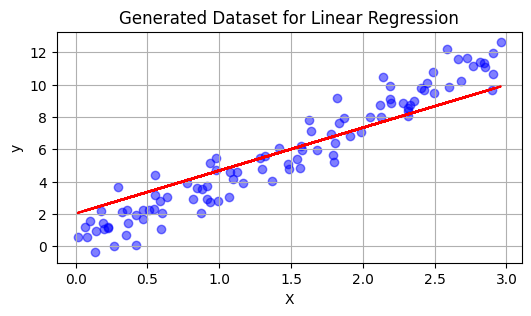

the model predictions are: [5.005264902525861, 9.596405405234377, 7.853571473496716, 6.791111833487173, 3.2640157596914667, 3.2638235629581693, 2.483638081118461, 8.922778259669823, 6.810686231918595, 7.662958381862813, 2.184833097146298, 9.749361663040343, 8.653978885574304, 3.712795308676868, 3.4696488383557504, 3.4822351401649554, 4.445108907672432, 6.202236604281065, 5.462685533631454, 4.34141633614826, 6.896249123355245, 3.132341020642551, 4.348711399860084, 4.940097783020542, 5.6549209877152755, 8.277342842273024, 3.6118739137183606, 6.118393991616271, 6.741358315872567, 2.390941021243791, 6.861921258085372, 3.3796000969880478, 2.5391611844472073, 9.581833186752306, 9.715274630161158, 8.462378290608694, 4.4480693475619075, 2.7990919458598524, 7.472997200281808, 5.528085324455902, 2.9932490023366314, 5.966537501063414, 2.2948280049348644, 9.266565515072205, 4.082851045418309, 7.299999051774094, 4.5046229626765175, 6.164877847857593, 6.377171895712385, 3.493788771767293, 9.74677017

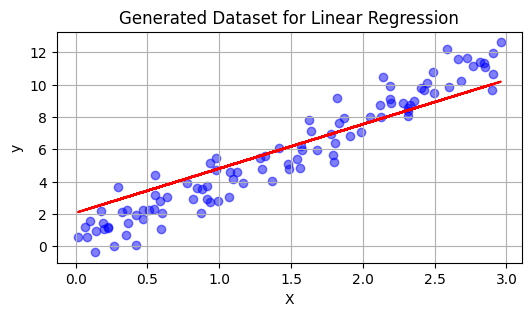

the model predictions are: [5.143940485295377, 9.883955399336754, 8.084607541378514, 6.987696101564971, 3.3462288053266063, 3.346030376334568, 2.540546245004431, 9.188484913387692, 7.007905228348086, 7.887813542888766, 2.2320520746381822, 10.041871486367528, 8.910969328459265, 3.8095606842034613, 3.558529835781659, 3.571524266741257, 4.5656206172302305, 6.379725736184129, 5.616193645953741, 4.4585656631921395, 7.096242621041462, 3.2102843212651497, 4.4660972799598095, 5.076660227115934, 5.814662614356532, 8.522120313413787, 3.705366766163494, 6.293164404804951, 6.936329253745759, 2.44484334808056, 7.060801624790006, 3.4655611329458917, 2.597869765749844, 9.868910655466479, 10.006679131847461, 8.713155805405371, 4.568677053690835, 2.8662291603245067, 7.691692593583973, 5.683714120158395, 3.0666820418739555, 6.136383746580728, 2.3456137273645203, 9.543419970788637, 4.191616016673944, 7.513084728382646, 4.627064502066258, 6.341155567723192, 6.560333558987079, 3.5834525416598995, 10.039195

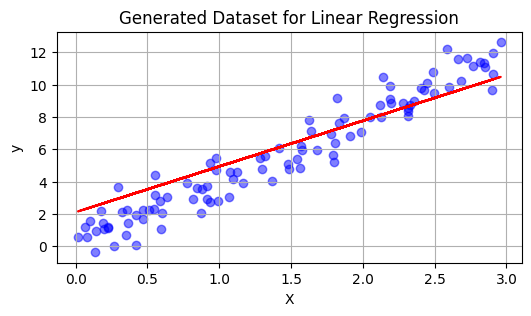

the model predictions are: [5.282616068064892, 10.17150539343913, 8.315643609260311, 7.184280369642771, 3.428441850961746, 3.4282371897109662, 2.5974544088904015, 9.45419156710556, 7.2051242247775775, 8.11266870391472, 2.2792710521300665, 10.334381309694715, 9.167959771344226, 3.9063260597300546, 3.647410833207568, 3.660813393317558, 4.686132326788028, 6.557214868087192, 5.769701758276029, 4.575714990236019, 7.296236118727679, 3.2882276218877484, 4.583483160059535, 5.213222671211325, 5.974404240997789, 8.766897784554551, 3.798859618608627, 6.467934817993632, 7.131300191618951, 2.4987456749173296, 7.2596819914946416, 3.5515221689037353, 2.6565783470524815, 10.155988124180654, 10.298083633533766, 8.96393332020205, 4.689284759819763, 2.933366374789161, 7.9103879868861355, 5.839342915860888, 3.1401150814112793, 6.306229992098043, 2.3963994497941767, 9.820274426505067, 4.300380987929579, 7.726170404991198, 4.749506041455999, 6.517433287588791, 6.743495222261773, 3.673116311552505, 10.331621

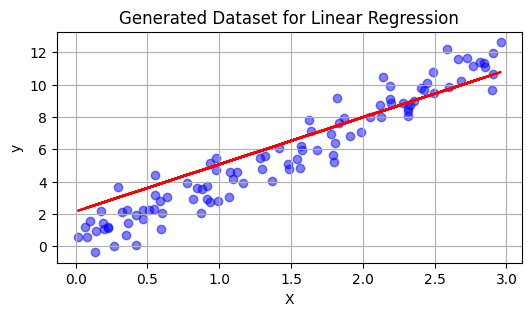

the model predictions are: [5.421291650834409, 10.459055387541506, 8.546679677142109, 7.38086463772057, 3.5106548965968853, 3.5104440030873647, 2.654362572776372, 9.71989822082343, 7.402343221207069, 8.337523864940673, 2.326490029621951, 10.6268911330219, 9.424950214229186, 4.003091435256648, 3.736291830633477, 3.7501025198938596, 4.806644036345827, 6.734703999990256, 5.923209870598316, 4.692864317279899, 7.4962296164138955, 3.3661709225103467, 4.700869040159261, 5.349785115306716, 6.134145867639046, 9.011675255695316, 3.8923524710537603, 6.64270523118231, 7.326271129492143, 2.5526480017540987, 7.458562358199275, 3.6374832048615793, 2.715286928355119, 10.443065592894827, 10.58948813522007, 9.214710834998728, 4.809892465948691, 3.0005035892538157, 8.1290833801883, 5.99497171156338, 3.2135481209486034, 6.4760762376153576, 2.447185172223833, 10.097128882221497, 4.409145959185214, 7.939256081599751, 4.87194758084574, 6.6937110074543895, 6.9266568855364685, 3.7627800814451113, 10.6240475421

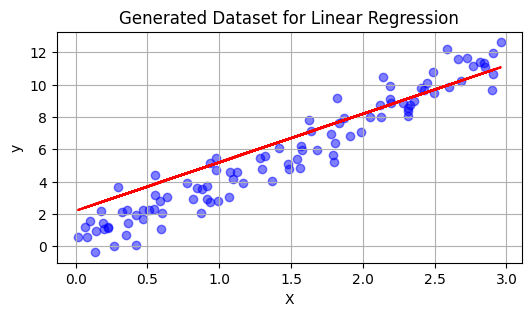

In [217]:
# USE LINEAR REGRESSION:

def fit_linear_regression_on_dataset(X, y):
  params = initialize(n_features=len(X[0]))
  print(f"Random params are: {params}")

  fit(params=params, X=X, y=y, n_epochs=100, learning_rate=0.005)
  print(f"After fit, params are: {params}")

  print_model_line_against_points(params=params, X=X, y=y)


fit_linear_regression_on_dataset(X=X, y=y)